# RSI buy & sell both Full bot on ZERODHA

This is the automated BUY and SELL code for zerodha , it will buy order and sell that order on indian exchange based on buy/sell strategy implemented on code.

importing all useful libraries

In [12]:
import time
import secrets 
import logging
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime
from kiteconnect import KiteTicker               
from kiteconnect import KiteConnect  
from IPython.display import clear_output

# Login to zerodha 

In [ ]:
api_key='*******'                      
api_secret='**********'   
kite=KiteConnect(api_key,api_secret)
kite.login_url()

Paste Token for login here 

In [ ]:
token="YfsDahPM4KxH0bGh4C16Jg1GqAJupAMg"
logging.basicConfig(level=logging.DEBUG)
kite = KiteConnect(api_key=api_key)
data = kite.generate_session(token,api_secret)
kite.set_access_token(data["access_token"])
print(data)

# Buy SELL Code 

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/857857/minute?instrument_token=857857&from=2019-01-05&to=2019-06-02&interval=minute&continuous=0 HTTP/1.1" 200 None
C:\Users\ashish\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\ashish\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\ashish\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.


 
 	 	 	 Relative Strength Index   

 
Current RSI status is   [37.86265222447122]
Current HIGH is         [398.1]

 
	  	 Buy Sell details and number of order Placed 
 
BUY price is                         []
BUY limit price is                   []
sell SL trigger price is             []
sell stoploss is price is            []
Number of order placed till now is   0


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


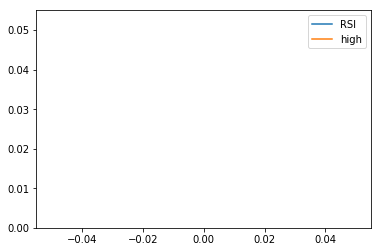

KeyboardInterrupt: 

In [13]:
# All Variables

check=[]
dataclose=[]
datarsi=[]
a=[]
b=[]
buyprice=[]
limitprice=[]
org_price=[]
orderplaced=[]
sellorder=[]
sellorder1=[]

def ashi():
    while(True): 
        
        # Fetching Live Data 
        
        km=datetime.now().minute
        ks=datetime.now().second
        if km%1==0 and ks==1:
            clear_output(wait=True)
            z=kite.historical_data(857857, "2019-01-05", "2019-06-02","minute",0)
            za=pd.DataFrame(z)                                        
            rsi_period=14
            chg=za["close"].diff(1)
            gain=chg.mask(chg<0,0) 
            loss=chg.mask(chg>0,0)
            avg_gain=gain.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
            avg_loss=loss.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
            rs =abs(avg_gain / avg_loss)
            rsi =100 -(100/(1+rs))
            za['rsi']=rsi
            p=za.iloc[-1,6]
            o=za.iloc[-2,2] 
            a.append(p)
            b.append(o)

            # Interface

            print(" \n \t \t \t Relative Strength Index   " )
            print("\n ")
            print("Current RSI status is  " , a)
            print("Current HIGH is        " , b)
            print("\n ")
            print("\t  \t Buy Sell details and number of order Placed \n ")
            #print("buy orignal price at the time of buy when buy order place is ", org_price)
            print("BUY price is                        " , buyprice)
            print("BUY limit price is                  " , limitprice )
            print("sell SL trigger price is            " , sellorder)
            print("sell stoploss is price is           " , sellorder1 )
            print("Number of order placed till now is  " , len(orderplaced))
            
            # Plotting of graph
            
            zz = pd.DataFrame({'RSI':a,"high":b })
            sns.kdeplot(zz['RSI'], shade=False)
            sns.kdeplot(zz['high'], shade=False)
            plt.show()
            time.sleep(60)

            # condition Checking for SELL order

            if 0 in check:

                # Strategy Implemented

                if za.iloc[-1,6]<=60:   
                    dataclose.append(za.iloc[-1,3])
                    datarsi.append(za.iloc[-1,6])
                    while za.iloc[-1,6]>=50:
                        triggerpriceis=min(dataclose)
                        sellorder.append(triggerpriceis)
                        stoplossis=triggerpriceis-5
                        sellorder1.append(stoplossis)
                        clear_output(wait=True) 
                        print("Buy Limit order placed and Price is ", limitprice , " and Triger price is ", buyprice )
                        print(" Sell Stoploss order placed and SL trigger price is  ", triggerpriceis, " and stoploss is",stoplossis)
                        
                        kite.place_order(variety="regular",tradingsymbol='SUNPHARMA',quantity=1,exchange='NSE',order_type='SL',trigger_price= triggerpriceis,stoploss= stoplossis,transaction_type='SELL',product='CNC',tag="ashishbt")
                        
                        # SELL LIMIT order implemented
                        
                        p = secrets.randbelow(1)
                        orderplaced.append(p)
                        print("no of order placed till now is", len(orderplaced))
                        a.clear()
                        b.clear()
                        check.clear()
                        ashi()         # or - raise SystemExit for one time
                else:
                    pass
            else:

                # condition Checking for BUY order

                if za.iloc[-1,6] > 30 and  za.iloc[-2,2] <  za.iloc[-1,2]:
                    p = secrets.randbelow(1)
                    check.append(p)
                    orgprice=za.iloc[-1,2]
                    cur_high=za.iloc[-1,2] + 1 
                    lim_price=cur_high+3
                    buyprice.append(cur_high) 
                    limitprice.append(lim_price)
                    org_price.append(orgprice) 
                    print("Congrats ! One Limit Buy Order placed Price is",  lim_price , "and trigger_price is ", cur_high)
                    
                    kite.place_order( variety="regular",tradingsymbol='SUNPHARMA',quantity=1,exchange='NSE',order_type='LIMIT',price=lim_price ,trigger_price=cur_high,transaction_type='BUY',product='CNC',tag="ashishbt")
                    # Buy LIMIT order implemented
                    
                else:
                    pass
ashi()